# Exercise for Lecture 14: Building Models
  
Having learned the basics of regression and classification, we will now use neural network to carry out these two tasks.

This notebook is not a tutorial, and will therefore only give you hints at how to solve the exercises. The results of this notebook will be part of your hand-in for this part of the course.

In [1]:
from IPython.core.display import HTML
css_file = './31380.css'
HTML(open(css_file, "r").read())

## Exercise 1: Regression

Import the combined gaia file from last exercise and split it into training set and test set. Use 3/4 of the data for training.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
# Import the gaia data here
gaia_data={}
gaia_data['RAW'] = pd.read_csv('all_gaia.csv')
print(gaia_data['RAW'].columns)

Index(['TIMESTAMP', 'WINDSPEED[m/s]', 'Unnamed: 2', 'RPM0[1/min]',
       'Unnamed: 4', 'RPM1[1/min]', 'Unnamed: 6', 'P[kW]', 'Unnamed: 8',
       'U[V]', 'Unnamed: 10', 'STATE[-]', 'Unnamed: 12'],
      dtype='object')


Plot the scatter plot of windspeed vs. power output. Remember that this is the underlying function we want to approximate.

In [4]:
# change the names
gaia_data['GAIA'] = gaia_data['RAW'].rename(columns={
    'WINDSPEED[m/s]': 'WINDSPEED', 'RPM0[1/min]': 'RMP0'
    ,'RPM1[1/min]':'RPM0', 'P[kW]':'POWER OUTPUT'})

gaia_data['GAIA'].head()

,TIMESTAMP,WINDSPEED,Unnamed: 2,RMP0,Unnamed: 4,RPM0,Unnamed: 6,POWER OUTPUT,Unnamed: 8,U[V],Unnamed: 10,STATE[-],Unnamed: 12
0,1507680001000,4.2,AAA8/,1009.0,AAA8/,55.0,AAA8/,3.6,AAA8/,400.1,AAA8/,64,AAA8/
1,1507680002000,4.2,AAA8/,1009.0,AAA8/,55.0,AAA8/,3.6,AAA8/,400.1,AAA8/,64,AAA8/
2,1507680003000,4.1,AAA8/,1009.0,AAA8/,55.0,AAA8/,3.6,AAA8/,398.4,AAA8/,64,AAA8/
3,1507680004000,4.1,AAA8/,1010.0,AAA8/,55.0,AAA8/,3.6,AAA8/,400.1,AAA8/,64,AAA8/
4,1507680005000,4.1,AAA8/,1011.0,AAA8/,55.0,AAA8/,3.6,AAA8/,400.1,AAA8/,64,AAA8/


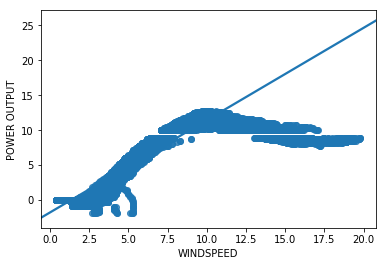

In [5]:
# Your scatter plot looks nice here
sns.regplot(x=gaia_data['GAIA']['WINDSPEED'],y=gaia_data['GAIA']['POWER OUTPUT'],fit_reg=True)


Try your hand at generating your first neural network. You can use the example from the lecture to get started. Choose different activation functions, learning rates, epochs and batch sizes. What can you say about the relationship between these values and their influence on the RMSE of your model prediction. Refer to the [Keras documentation](https://keras.io) in order to get an idea of the capabilities of the library.

In [6]:
#Split the data. 25% for test and 75% for training
# creating train data
gaia_data['NO_NAN'] = gaia_data['GAIA'].dropna()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(gaia_data['NO_NAN']['WINDSPEED'],
                                                    gaia_data['NO_NAN']['POWER OUTPUT'], 
                                                    test_size=0.25, 
                                                    random_state=42)


# Remember to import the kind of layers you want from the keras library.
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
model = Sequential()
model.add(Dense(10, input_shape=(1,)))
model.add(Activation('relu')) #relu
model.add(Dense(1))
model.add(Activation('linear'))
adam = optimizers.Adam(lr=0.01, beta_1=0.9,
beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='mean_squared_error', optimizer=adam)
model.fit(x_train.values,y_train.values,
epochs = 50, batch_size=500, shuffle=False)
y_pred = model.predict(x_test.values, batch_size = 1000)

Using TensorFlow backend.


Epoch 1/50
299639/299639 [==============================] - 0s - loss: 2.2510     
Epoch 2/50
299639/299639 [==============================] - 0s - loss: 2.0690     
Epoch 3/50
299639/299639 [==============================] - 1s - loss: 2.0700     
Epoch 4/50
299639/299639 [==============================] - 0s - loss: 2.0703     
Epoch 5/50
299639/299639 [==============================] - 0s - loss: 2.0704     
Epoch 6/50
299639/299639 [==============================] - 0s - loss: 2.0702     
Epoch 7/50
299639/299639 [==============================] - 0s - loss: 2.0700     
Epoch 8/50
299639/299639 [==============================] - 0s - loss: 2.0698     
Epoch 9/50
299639/299639 [==============================] - 0s - loss: 2.0696     
Epoch 10/50
299639/299639 [==============================] - 0s - loss: 2.0694     
Epoch 11/50
299639/299639 [==============================] - 0s - loss: 2.0693     
Epoch 12/50
299639/299639 [==============================] - 0s - loss: 2.0691     
E

Try plotting the time series of your prediction and your y_test. Does it look as expected? How about a scatter plot of the windspeed vs. your prediction?

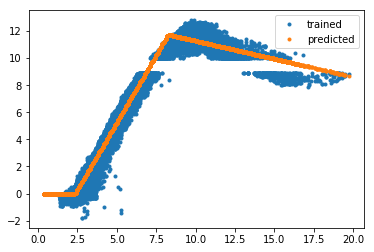

In [9]:
# Your pretty plots here
plt.plot(x_test,y_test,ls='',marker='.',label='trained')
plt.plot(x_test,y_pred,ls='',marker='.',label='predicted')
plt.legend()

If you want to try something with more dimensions, play with the solar data, or find a fun data set [here](https://archive.ics.uci.edu/ml/datasets.html)

## Exercise 2: Classification

In this exercise we will use the following set of data: https://archive.ics.uci.edu/ml/machine-learning-databases/00194/

Download the AllData.zip, unpack it and read the file Wall-following.names

Import the sensor_readings_XX.data files, and visualize the data with 2 sensor readings in a scatter plot.

* *Hint: Use the code snippet provided below*

Int64Index([0, 1, 2], dtype='int64')


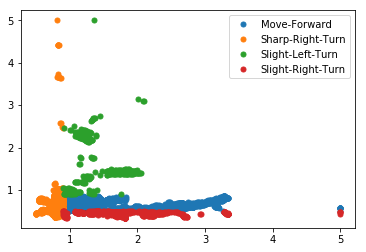

In [19]:
# Import the files by using pandas here, notice that there's no header,
# so you will have to set the option header=None when importing
file_2sens = pd.read_csv('sensor_readings_2.data',header=None)
print(data_2_sensors.columns)

# Visualize here
data_2_sensors = file_2sens.groupby(file_2sens[2])

fig, ax = plt.subplots()
ax.margins(0.05) # A adds 5% padding to the autoscaling
for movement,sensor in data_2_sensors:
    ax.plot(sensor[0], sensor[1], marker='o', linestyle='', ms=5, label=movement)
ax.legend()

plt.show()

As in the previous exercise, create, train and tune a neural network classifier that allows the robot to decide which action it should take. Remember to split training set and test set. In the case of a classifier you must choose a different loss function. A popular one for classification is the categorical_crossentropy.

In [46]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(file_2sens[2])
fC = le.transform(file_2sens[2])
print(fC

[3 3 3 ..., 1 0 1]


In [50]:
file_2sens.iloc[:,:2].head()

,0,1
0,1.687,0.445
1,1.687,0.449
2,1.687,0.449
3,1.687,0.449
4,1.687,0.449


In [62]:
# Your neural network goes here.
#Split the data. 25% for test and 75% for training
# creating train data


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(file_2sens.iloc[:,:2].values,
                                                    fC,
                                                    test_size=0.25, 
                                                    random_state=42)


# Remember to import the kind of layers you want from the keras library.
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
model = Sequential()
model.add(Dense(10, input_shape=(2,)))
model.add(Activation('relu')) #relu
model.add(Dense(1))
model.add(Activation('relu'))
adam = optimizers.Adam(lr=0.001, beta_1=0.9,
beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=adam)
model.fit(x=x_train,y=y_train,
epochs = 50, batch_size=500, shuffle=False)
y_pred = model.predict(x_test, batch_size = 1000)

Epoch 1/50
4092/4092 [==============================] - 0s - loss: 1.7055     
Epoch 2/50
4092/4092 [==============================] - 0s - loss: 1.4147     
Epoch 3/50
4092/4092 [==============================] - 0s - loss: 1.2588     
Epoch 4/50
4092/4092 [==============================] - 0s - loss: 1.1404     
Epoch 5/50
4092/4092 [==============================] - 0s - loss: 1.0443     
Epoch 6/50
4092/4092 [==============================] - 0s - loss: 0.9564     
Epoch 7/50
4092/4092 [==============================] - 0s - loss: 0.8732     
Epoch 8/50
4092/4092 [==============================] - 0s - loss: 0.8186     
Epoch 9/50
4092/4092 [==============================] - 0s - loss: 0.8156     
Epoch 10/50
4092/4092 [==============================] - 0s - loss: 0.7697     
Epoch 11/50
4092/4092 [==============================] - 0s - loss: 0.7541     
Epoch 12/50
4092/4092 [==============================] - 0s - loss: 0.7307     
Epoch 13/50
4092/4092 [==========================

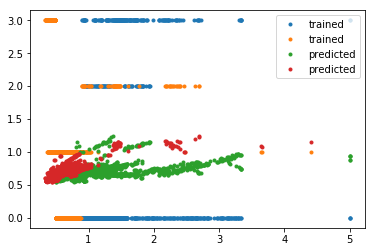

In [64]:
plt.plot(x_test,y_test,ls='',marker='.',label='trained')
plt.plot(x_test,y_pred,ls='',marker='.',label='predicted')
plt.legend()